# SIT718 Assessment 3

__Student Name: Thomas Warren__

__ID: 223053304__

__Email: s223053304@deakin.edu.au__


### Task 1.1 ###

**1)** Of the four outcome variables were considered, "Management" was selected for the target variable. This refers to the treatment of the patient and is divided into 4 categories:

* Conservative: non-surgical treatment, such as IV fluids and analgesics.
* Primary surgical  
* Secondary surgical
* Simultaneous appendectomy 

For the purposes of this assignment, the surgical procedures are grouped together to form a binary classification problem: conservative (non-surgical) treatment and surgery. 

In [1]:
import getpass
import datetime
import socket
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import math
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from umap.umap_ import UMAP
from umap.parametric_umap import ParametricUMAP
from tensorflow.keras.utils import plot_model



# def generate_author_claim():
#     # Get current user
#     user = getpass.getuser()

#     # Get current timestamp
#     timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

#     # Get current IP address
#     ip_address = socket.gethostbyname(socket.gethostname())

#     # Enter your name
#     name = input("Enter your full name: ")

#     # Enter your email address
#     email = input("Enter your email address: ")

#     # Enter your student ID
#     student_id = input("Enter your student ID: ")

#     # Generate author claim string
#     author_claim = f"Code authored by {user} ({name} {student_id} {email}) on {timestamp}  from IP address {ip_address}"

#     return author_claim

# # Generate the author claim string
# author_claim = generate_author_claim()

# # Print the author claim string
# print(author_claim)


In [2]:
# Import the Excel file
df = pd.read_excel('../data/raw/app_data.xlsx')

# Drop other target variables
df = df.drop(['Severity', 'Diagnosis_Presumptive', 'Diagnosis'], axis=1)

In [3]:
# Review dataset
df['Management'].value_counts()


Management
conservative                 483
primary surgical             270
secondary surgical            27
simultaneous appendectomy      1
Name: count, dtype: int64

In [4]:
df['Management'] = df['Management'].replace(['primary surgical', 'secondary surgical', 'simultaneous appendectomy'], 'surgery')

In [5]:
df[df['Management'] == 'conservative'].sample(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
260,14.425736,20.530000,female,150.5,46.5,2.0,conservative,2.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,NaN,Ovarialzyste
397,3.367556,14.191276,male,94.6,12.7,3.0,conservative,7.0,5.0,no,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,no,NaN
191,13.640000,21.200000,female,158.0,53.0,3.0,conservative,5.0,4.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,12.629706,22.210000,male,163.0,59.0,3.0,conservative,4.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
275,11.898700,16.836735,male,140.0,33.0,3.0,conservative,10.0,10.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,9.490000,14.600000,male,136.0,27.0,3.0,conservative,9.0,9.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,15.260000,15.900000,male,174.0,47.5,3.0,conservative,5.0,5.0,no,...,NaN,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
311,14.516085,26.750493,male,156.0,65.1,3.0,conservative,NaN,NaN,yes,...,NaN,no,NaN,no,NaN,NaN,yes,yes,NaN,NaN
10,11.870000,15.700000,male,147.0,34.0,2.0,conservative,8.0,9.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
164,11.820000,16.700000,male,147.0,36.0,3.0,conservative,7.0,5.0,yes,...,NaN,yes,re UB,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df[df['Management'] == 'surgery'].sample(10)

,Age,BMI,Sex,Height,Weight,Length_of_Stay,Management,Alvarado_Score,Paedriatic_Appendicitis_Score,Appendix_on_US,...,Abscess_Location,Pathological_Lymph_Nodes,Lymph_Nodes_Location,Bowel_Wall_Thickening,Conglomerate_of_Bowel_Loops,Ileus,Coprostasis,Meteorism,Enteritis,Gynecological_Findings
719,2.132786,15.432099,female,90.0,12.5,7.0,surgery,3.0,3.0,no,...,an den M. psoas rechts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
554,8.170000,17.590000,male,146.0,37.5,5.0,surgery,8.0,6.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
684,10.149213,18.444444,female,150.0,41.5,4.0,surgery,9.0,7.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
776,14.351814,19.735976,female,151.0,45.0,7.0,surgery,4.0,6.0,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,yes,NaN,Ovarialzysten
706,16.930869,19.151585,female,177.0,60.0,10.0,surgery,10.0,10.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,14.420000,23.240000,female,151.0,53.0,6.0,surgery,NaN,NaN,no,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
657,8.013689,15.237853,male,125.5,24.0,6.0,surgery,2.0,4.0,yes,...,NaN,yes,rechter Unterbauch,NaN,NaN,NaN,NaN,NaN,NaN,NaN
590,3.200000,14.790000,male,104.0,16.0,7.0,surgery,6.0,5.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
626,11.337440,21.770941,female,157.2,53.8,4.0,surgery,7.0,5.0,yes,...,NaN,yes,NaN,yes,NaN,NaN,NaN,NaN,NaN,NaN
559,3.430000,14.580000,male,98.0,14.0,8.0,surgery,10.0,8.0,yes,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Inspection of the above datasets reveals a high number of NaN values which will need to be addressed in the data preprocessing. No distinct patterns can be seen from the 10 examples, although conservative treatments tended to be have shorter stays which is logical as recovery times would be shorter.  

**2) Data Types and Preprocessing**

The datatypes present in the dataset are:

* Numerical/Floats (numerical values for Age, BMI, Body Temperature, etc.)
* Categorical/Objects (string values for categorical columns like Sex, usea, etc.)

Preprocessing steps completed were:

* Filling numerical values with NaN with 0 as appropriate to the columns.
* Dropping columns with high amounts of missing values (over 80% or more than 100 missing values) that cannot be reasonably estimated.
* Using median values for numerical columns than can be estimated, such as median height by age. 
* Following these steps less than 50 rows had missing values which could not be easily estimated. As such these were dropped.
* Converting categorical features to boolean using one hot encoding, as the model requires numerical inputs.
 

In [8]:
# Drop rows with many missing values
empty_columns = []
for i in df.columns:
    if df[i].isna().sum() >= len(df)*0.8 or df[i].isna().sum() > 100:
        empty_columns.append(i)
    else:
        continue

print(empty_columns)
len(empty_columns)

#Drop empty columns
df = df.drop(empty_columns, axis=1)

['Appendix_Diameter', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Ipsilateral_Rebound_Tenderness', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings']


In [9]:
## Resolve missing heights
# Round all ages to the nearest whole number
df['Age'] = df['Age'].round(0)

# Find average heights for sexes and ages
mean_height_df = df.groupby(['Sex', 'Age'])['Height'].mean().reset_index()

# For scores, NaN values are considered 0
df['Paedriatic_Appendicitis_Score'] = df['Paedriatic_Appendicitis_Score'].fillna(0)


In [10]:
# Determine numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill numerical missing data with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Drop remaining rows with missing values
df.dropna(axis=0, inplace=True)

In [11]:
# For convienence, we will convert the target variable without dropping the first
df = pd.get_dummies(df, columns=['Management'], drop_first=False)

# Determine categorical columns other than target
categorical_columns = df.select_dtypes(include='object').columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

**3) Data Preparation**

In creating the training, testing, and validation test sets, a test size of 20% was selected, or 127 rows. It was found through experimentation that this was suitable and did not impact the training optimisation or generalisation. Normalisation was applied to scale all input features to treat them equally during model training.

In [28]:
# Create train and test datasets
X = df.drop(['Management_conservative','Management_surgery'], axis=1)
y = df[['Management_conservative','Management_surgery']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
X_train_scaled.shape    

(506, 32)

## Task 1.2

**Model Set Up**

The neural network architecture was designed as follows:

* Input layer size matches the number of features after preprocessing (32). This did *not* need to be reshaped as data is already in a flat (in this case tabular) form.
* One hidden layer with 512 nodes each, using 'relu' activation function to introduce non-linearity and manage vanishing gradient problems. This was selected following several experiments, including multiple hidden layers and alternate node number.
* Output layer with 2 nodes, corresponding to our binary classes, using 'softmax' activation for outputting class probabilities.

The choices of layer sizes and activations were driven by the need to capture complex patterns in the data while avoiding overfitting. The 'softmax' output is used because it is suitable for binary classification, providing probabilities that sum to one, which makes it easier to interpret the model's predictions.

In [15]:
# Create the first model
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)),  
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [38]:

# Plot the model structure
plot_model(model1, to_file='model_structure.png', show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


**Fitting the Model**

* *Loss function*: Binary crossentropy was chosen because it is appropriate for binary classification tasks. This provides a measure of the "distance" between the model's predictions and the actual labels.
* *Metrics*: Accuracy was used as it is a straightforward indicator of overall model performance, showing the proportion of correctly predicted instances.
* *Optimiser*: The 'adam' optimizer was selected due to its known efficiency and adaptive learning rate capabilities, which helps in faster convergence.

The model was trained for 30 epochs with a batch size of 32. Although fewer epochs were possible, the time required for training is minimal and this serves to demonstrate the overfitting. The batch size was chosen based on experimental tuning, whereby it was shown to have minimal impacts on the final results.


In [16]:
from datetime import datetime

# Set up TensorBoard logging
log_dir = "logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

# Train the model
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history1 = model1.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])

# Evaluate the model on the test set
test_loss, test_acc = model1.evaluate(X_test_scaled, y_test)


Epoch 1/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6508 - loss: 0.6436 - val_accuracy: 0.8431 - val_loss: 0.4436
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8355 - loss: 0.4374 - val_accuracy: 0.8627 - val_loss: 0.3600
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8655 - loss: 0.3531 - val_accuracy: 0.8824 - val_loss: 0.3240
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8694 - loss: 0.3100 - val_accuracy: 0.8725 - val_loss: 0.3054
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8966 - loss: 0.2627 - val_accuracy: 0.8824 - val_loss: 0.2893
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9076 - loss: 0.2251 - val_accuracy: 0.8824 - val_loss: 0.2813
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9363 - loss: 0.1787 - val_accuracy: 0.8824 - val_loss: 0.2755
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9335 - loss: 0.1748 - val_accuracy: 0.8824 - val_loss

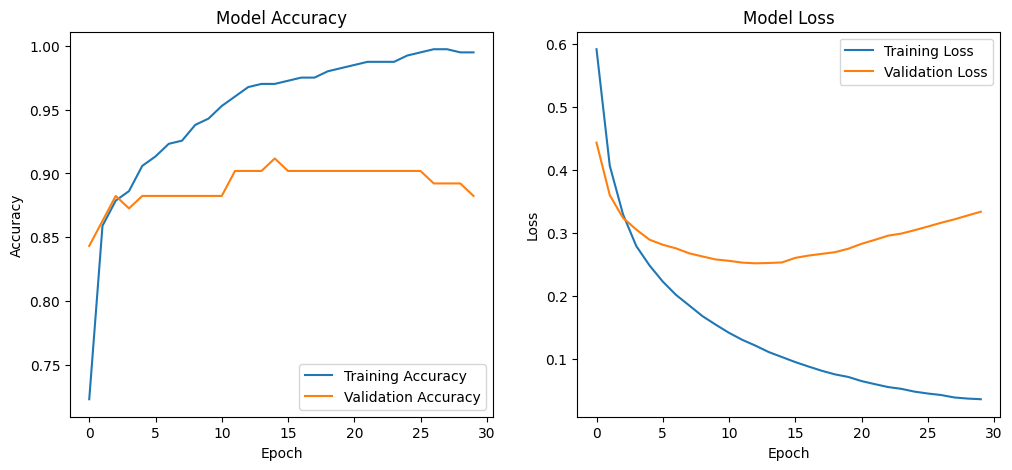

In [17]:
# Visualize the training history ofr evaluation
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'], label='Training Accuracy')
plt.plot(history1.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'], label='Training Loss')
plt.plot(history1.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

## Task 2.1 Improve the Model

In order to address the overfitting seen above, the dropout method was selected. 

In [18]:
# Define the model with Dropout
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model and capture the history
history2 = model2.fit(X_train_scaled, y_train, epochs=30, batch_size=32, validation_split=0.2, callbacks=[tensorboard_callback])


Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5607 - loss: 0.7039 - val_accuracy: 0.6765 - val_loss: 0.5368
Epoch 2/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6253 - loss: 0.5923 - val_accuracy: 0.8137 - val_loss: 0.4574
Epoch 3/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7428 - loss: 0.5325 - val_accuracy: 0.8333 - val_loss: 0.4139
Epoch 4/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7589 - loss: 0.4532 - val_accuracy: 0.8333 - val_loss: 0.3674
Epoch 5/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7884 - loss: 0.4699 - val_accuracy: 0.8333 - val_loss: 0.3444
Epoch 6/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8098 - loss: 0.4346 - val_accuracy: 0.8431 - val_loss: 0.3272
Epoch 7/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7852 - loss: 0.4302 - val_accuracy: 0.8431 - val_loss: 0.3144
Epoch 8/30
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8446 - loss: 0.3523 - val_accuracy: 0.8627 - val_loss: 0.2977
Ep

In [19]:
import tensorflow.keras as keras
from tensorflow.keras.utils import plot_model

plot_model(model1, to_file='model1.png', show_shapes=True)


You must install graphviz (see instructions at https://graphviz.gitlab.io/download/) for `plot_model` to work.


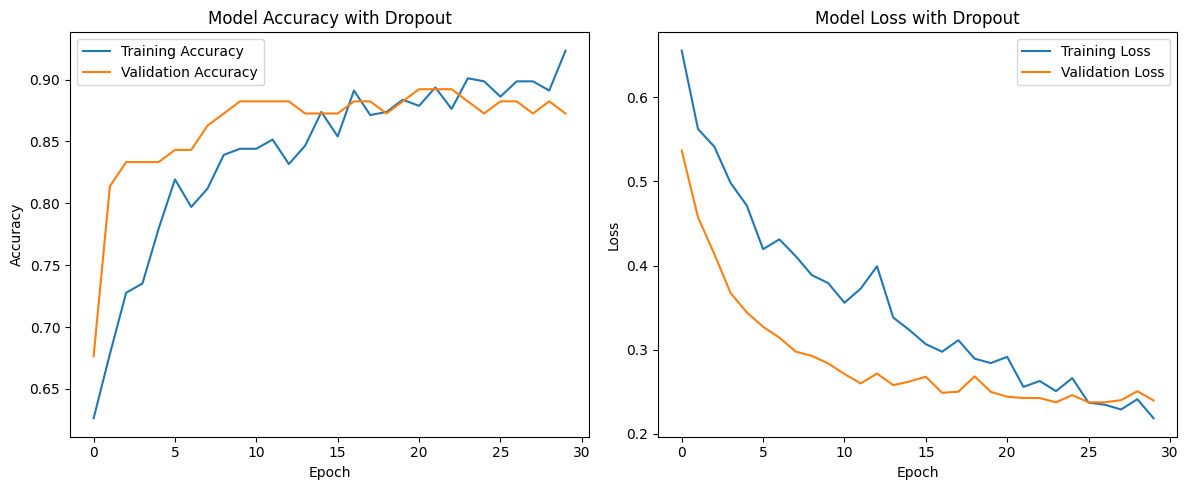

In [20]:
# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Model Loss with Dropout')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


*Discussion*

As can be seen from comparing the two graphs, the use of the drop out method substantially reduces the overfitting of the model.


## Task 3: Analyse the Learned Representation

In [21]:
# Repeat pre-processing steps
df = pd.read_excel('../data/raw/app_data.xlsx')
df = df.drop(['Severity', 'Diagnosis_Presumptive', 'Diagnosis'], axis=1)
df['Management'] = df['Management'].replace(['primary surgical', 'secondary surgical', 'simultaneous appendectomy'], 'surgery')
# Drop rows with many missing values
empty_columns = []
for i in df.columns:
    if df[i].isna().sum() >= len(df)*0.8 or df[i].isna().sum() > 100:
        empty_columns.append(i)
    else:
        continue

print(empty_columns)
len(empty_columns)

#Drop empty columns
df = df.drop(empty_columns, axis=1)

## Resolve missing heights
# Round all ages to the nearest whole number
df['Age'] = df['Age'].round(0)

# Find average heights for sexes and ages
mean_height_df = df.groupby(['Sex', 'Age'])['Height'].mean().reset_index()

# For scores, NaN values are considered 0
df['Paedriatic_Appendicitis_Score'] = df['Paedriatic_Appendicitis_Score'].fillna(0)

# Determine numerical columns
numerical_columns = df.select_dtypes(include='number').columns

# Fill numerical missing data with median
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].median())

# Drop remaining rows with missing values
df.dropna(axis=0, inplace=True)

# For convienence, we will convert the target variable without dropping the first
df = pd.get_dummies(df, columns=['Management'], drop_first=False)

# Determine categorical columns other than target
categorical_columns = df.select_dtypes(include='object').columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Create train and test datasets
X = df.drop(['Management_conservative','Management_surgery'], axis=1)
y = df[['Management_conservative','Management_surgery']]

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reset index to ensure proper alignment
y_train = y_train.reset_index(drop=True)

# Recalculate indices based on the target column for sampling
class_0_indices = y_train[y_train['Management_conservative'] == 1].index
class_1_indices = y_train[y_train['Management_surgery'] == 1].index

# Sample balanced indices
sample_size = min(len(class_0_indices), len(class_1_indices))
balanced_indices = np.random.choice(class_0_indices, sample_size, replace=False).tolist() + np.random.choice(class_1_indices, sample_size, replace=False).tolist()

# Extract the balanced subset
X_train_subset = X_train_scaled[balanced_indices]
y_train_subset = y_train.iloc[balanced_indices]

# Ensure balanced subset is correctly sized
print(f'Subset size: {X_train_subset.shape}')


['Appendix_Diameter', 'Neutrophil_Percentage', 'Segmented_Neutrophils', 'Ketones_in_Urine', 'RBC_in_Urine', 'WBC_in_Urine', 'Ipsilateral_Rebound_Tenderness', 'Appendix_Wall_Layers', 'Target_Sign', 'Appendicolith', 'Perfusion', 'Perforation', 'Surrounding_Tissue_Reaction', 'Appendicular_Abscess', 'Abscess_Location', 'Pathological_Lymph_Nodes', 'Lymph_Nodes_Location', 'Bowel_Wall_Thickening', 'Conglomerate_of_Bowel_Loops', 'Ileus', 'Coprostasis', 'Meteorism', 'Enteritis', 'Gynecological_Findings']
Subset size: (348, 32)


In [22]:
# Define the model 
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(32, activation='relu')(inputs)
x = Dropout(0.5)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(2, activation='softmax')(x)

In [23]:
model = Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Initialize the model by training it on your data for at least one epoch or by predicting
_ = model.predict(X_train_scaled[:1])

# After the model is initialized, create the feature extractor
feature_layer = model.layers[-2].output
feature_extractor_model = Model(inputs=model.input, outputs=feature_layer)

# Use the feature extractor model to predict
features = feature_extractor_model.predict(X_test_scaled)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [24]:
# Modify the model to extract features from all layers except the input layer
layer_outputs = [layer.output for layer in model.layers[1:]]  # Skip the input layer
multi_output_model = Model(inputs=model.input, outputs=layer_outputs)

# Use the multi-output model to predict
all_features = multi_output_model.predict(X_train_subset)  # Using the subset for visualization


11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


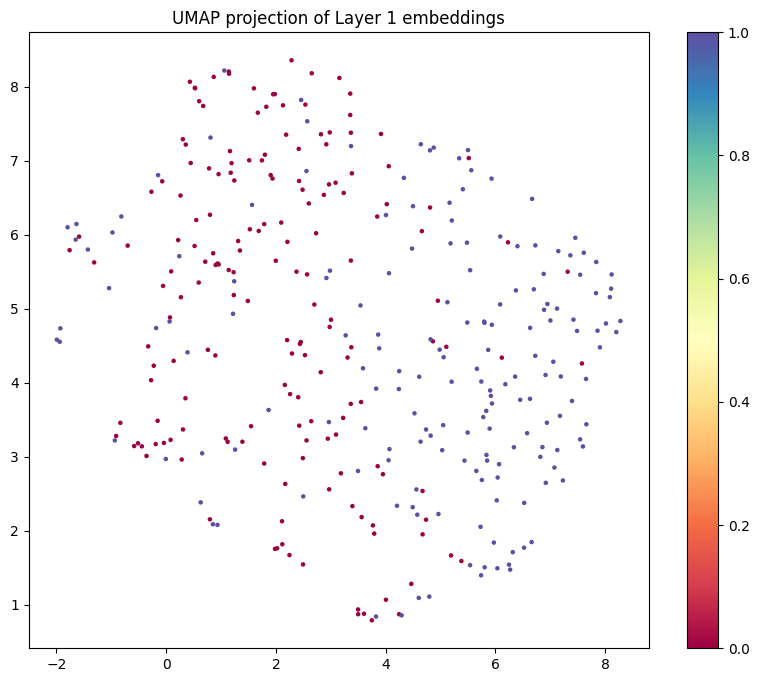

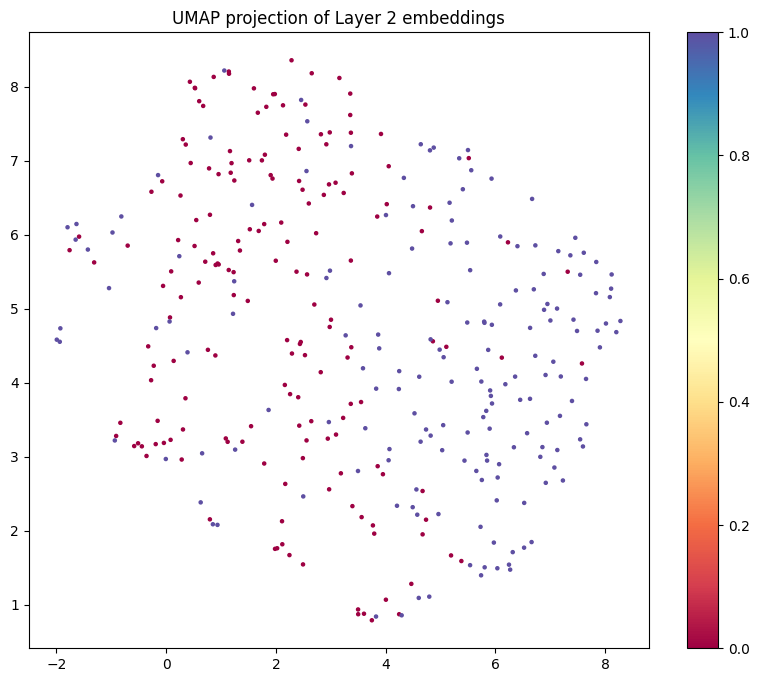

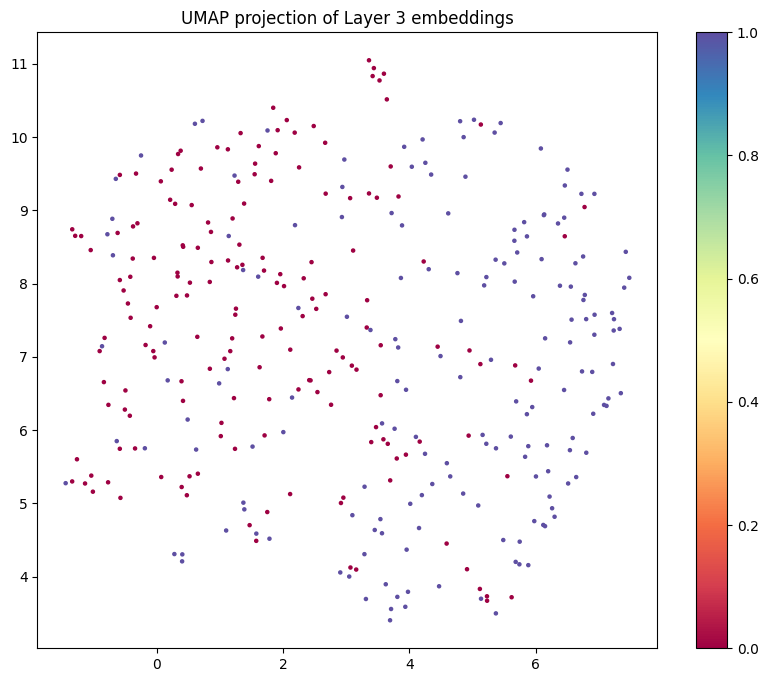

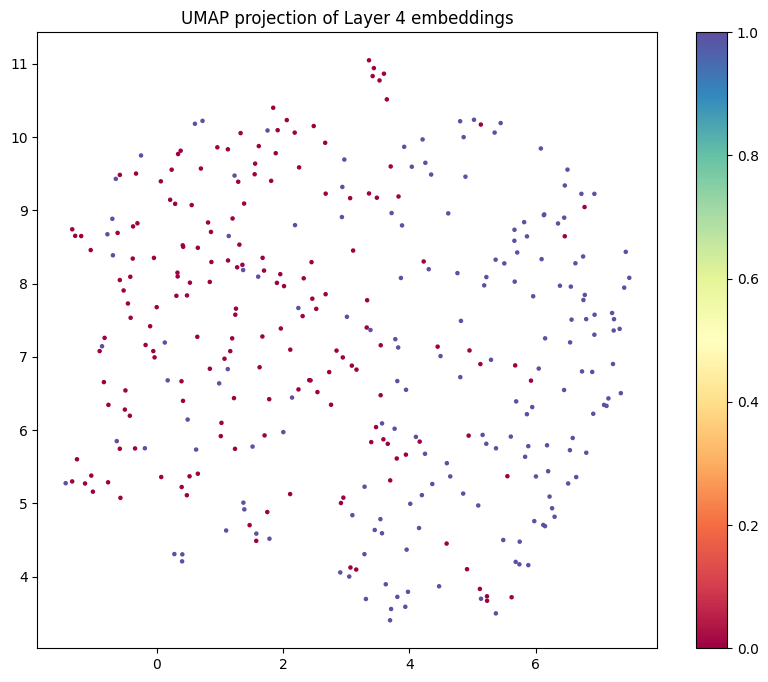

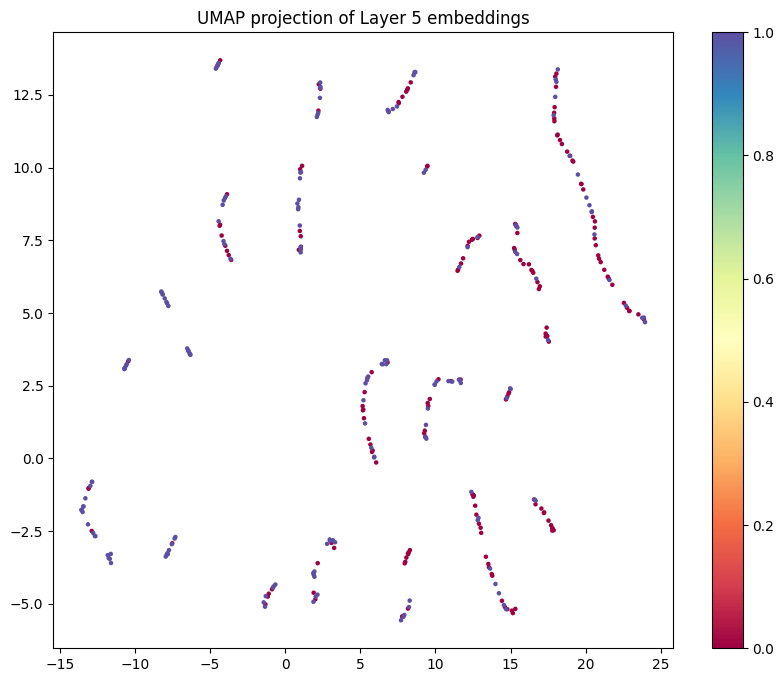

In [25]:
# Setting up UMAP: adjust n_neighbors and min_dist based on your dataset specifics
reducer = UMAP(n_neighbors=5, min_dist=0.3, random_state=42)

for i, features in enumerate(all_features):
    # Each 'features' corresponds to layer outputs; ensure they're 2D first
    if len(features.shape) > 2:
        features = features.reshape(features.shape[0], -1)
    
    embedding = reducer.fit_transform(features)
    
    # Visualization
    plt.figure(figsize=(10, 8))
    plt.scatter(embedding[:, 0], embedding[:, 1], c=y_train_subset['Management_surgery'], cmap='Spectral', s=5)
    plt.title(f'UMAP projection of Layer {i+1} embeddings')
    plt.colorbar()
    plt.show()